In [1]:
import pandas as pd
import numpy as np
import scipy

In [2]:
nooftvads = [1,3,2,1,3]
noofcarssold = [14,24,18,17,27]

In [3]:
# zip function ?

In [4]:
list(zip(nooftvads,noofcarssold))

[(1, 14), (3, 24), (2, 18), (1, 17), (3, 27)]

In [5]:
df = pd.DataFrame(zip(nooftvads,noofcarssold),columns=["Tvads","CarsSold"])

In [6]:
df

,Tvads,CarsSold
0,1,14
1,3,24
2,2,18
3,1,17
4,3,27


In [7]:
#Tvads independent varibale and carssold is the dependent variable

In [8]:
X = df[["Tvads"]]  #Feature matrix created for independent variable
y = df["CarsSold"]

In [9]:
import statsmodels.api as sm

In [10]:
X = sm.add_constant(X) #to make it 2D

In [11]:
model = sm.OLS(y,X).fit() #OLS = ordinary least sqaure method

In [12]:
print_model = model.summary()

/Users/sathvikc/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [13]:
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CarsSold   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Sat, 15 Aug 2020   Prob (F-statistic):             0.0190
Time:                        10:33:24   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000      2.366      4.226      0.024       2.469      17.531
Tvads          5.0000      1.080      4.629      0.019       1.563       8.437
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.214
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.674
Skew:                           0.256   Prob(JB):                        0.714
Kurtosis:                       1.276   Cond. No.                         6.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# dfresidual = n-k-1  = 5-1-1 = 3 # n = no of observations k = noindependent variables 

In [15]:
#t is the test , if p is < .05 reject r else accept it

In [16]:
from sklearn.linear_model import LinearRegression 

In [17]:
lg = LinearRegression() #making object of model

In [18]:
lg.fit(X,y) # y = mx+c

LinearRegression()

In [19]:
lg.coef_  # 5 is coefficient    y=5x+10

array([0., 5.])

In [20]:
lg.score(X,y) # Rsqare matrix

0.8771929824561404

In [21]:
lg.intercept_ # gives the intercept in the line y= 5x+10

10.000000000000002

In [22]:
lg.predict([[0,4]]) # To feature matrix to predict target variable suppose there ae 4 tvads we sell 30 cars

array([30.])

In [23]:
#you are 87% correct

In [24]:
# Three majore evaluation metrics 
# 1. MSE 2. RMSE 3 MAE

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [26]:
y_true = [14,24,18,17,27]

In [27]:
y_pred = [15,25,20,15,25]

In [28]:
mean_squared_error(y_true,y_pred)

2.8

In [29]:
mean_absolute_error(y_true,y_pred)

1.6

In [30]:
import numpy as np

In [31]:
np.sqrt(mean_squared_error(y_true,y_pred))

1.6733200530681511

In [32]:
#https://www.hackerrank.com/domains/tutorials/30-days-of-code?filters%5Bstatus%5D%5B%5D=unsolved&badge_type=30-days-of-code

In [33]:
#Assumptions of Linear Regression :
#1.Linear Distribution : Scatter Plot
#2. prescene of normality : Histograms
#3.Multicollinearity: no features should depend on each other heavily,
#Make heatmaps to get this correlation(pearsons correlation)
#4. Autocorrelation: values of target values are dependent on the adjascent target value
#5.Homo:similar/Hetero:not similar Scesdasticity:error 

In [34]:
# https://medium.com/analytics-vidhya/assumptions-of-linear-regression-d4c42567aa1b

In [35]:
data = pd.read_csv("Boston1.csv")

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [37]:
data.head() #Boston housing data set

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [38]:
#Refer UCI repository data sets
#crim = crime rate, indus = area of non retail bussiness in the town, age = age of the people who owns the town

In [39]:
from sklearn.datasets import load_boston

In [40]:
boston = load_boston()

In [41]:
type(boston) #dictionary like structure 

sklearn.utils.Bunch

In [42]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [43]:
print(boston.data.shape)

(506, 13)


In [44]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [45]:
type(boston.data)

numpy.ndarray

In [46]:
house = pd.DataFrame(boston.data)

In [47]:
house.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [48]:
house.columns = boston.feature_names
print(house.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [49]:
house.columns = boston.feature_names
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [50]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [51]:
boston.target.shape

(506,)

In [52]:
type(boston.target)

numpy.ndarray

In [53]:
house["PRICE"] = boston.target

In [54]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [55]:
#we have to predict a model to predict price of the new set of features or new house in boston

In [56]:
house.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [57]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [58]:
#Find the presence of outliers in the dataset usng boxplot

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='PRICE'>

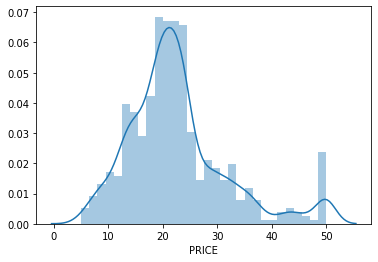

In [76]:
sns.distplot(house["PRICE"],bins=30)  #used to plot univariate variables.


In [77]:
#PRICE values are normally distribute with few outliers

In [78]:
corr_mat = house.corr().round(2)

<AxesSubplot:>

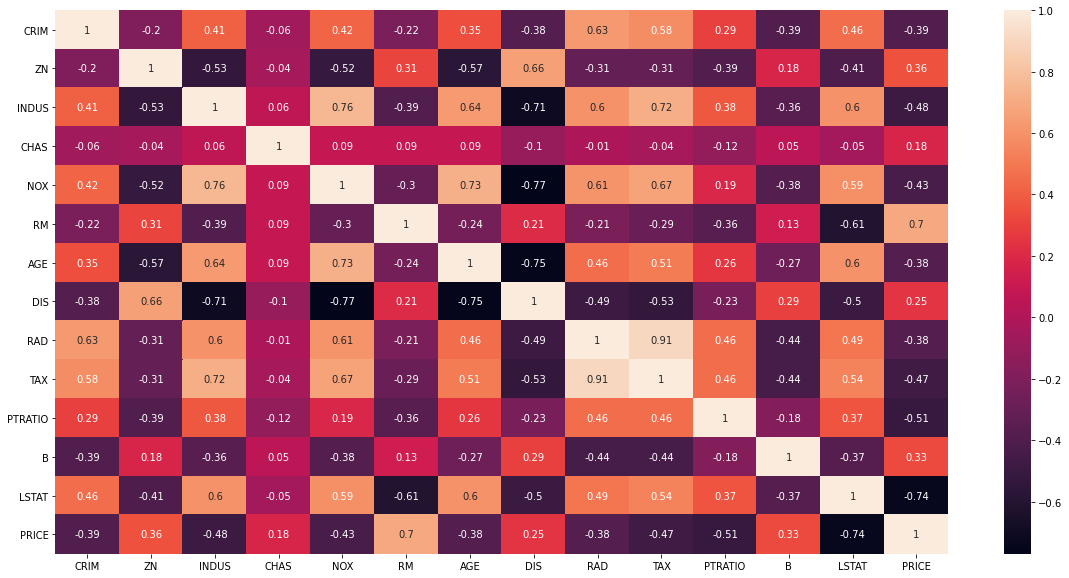

In [79]:
plt.figure(figsize=(20,10))
sns.heatmap(data=corr_mat,annot=True)

In [80]:
#Strongly correlated with price is RM and negative is LSTAT
#So Features -- RM,LSTAT

In [81]:
#Which 2 features are strongly correlated with each other in general ANS: RAD and TAX ,DIS and AGE
#But in general above 0.75 is considered to be highly correlated

In [82]:
#we have to avoid correlated items
#So we consider only RM and LSTAT to predict price of the hosue

In [83]:
 #X ---- feature set
 #y ---- target or vector of predictions

In [84]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [85]:
X = house.iloc[:,[5,12]]

In [86]:
X.head()

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33


In [87]:
y = house["PRICE"]

In [88]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [90]:
#To divide the data into 2 parts we use train and test data
# to know how well the model is working before production

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [99]:
X_train.shape


(379, 2)

In [100]:
y_train.shape


(379,)

In [101]:
X_test.shape

(127, 2)

In [102]:
y_test.shape

(127,)

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
lg = LinearRegression()

In [111]:
lg.fit(X_train,y_train)

LinearRegression()

In [114]:
model = lg.fit(X_train,y_train)

In [115]:
model

LinearRegression()

In [118]:
lg.score(X_test,y_test)

0.5780826814921924

In [119]:
lg.intercept_

-2.3205707325416114

In [121]:
lg.coef_    #(lstat and rm)

array([ 5.27320382, -0.64863772])

In [127]:
predicted = lg.predict(X_test)

In [128]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [129]:
mean_squared_error(y_test,predicted)

29.545664673377924

In [130]:
mean_absolute_error(y_test,predicted)

3.95726255353719

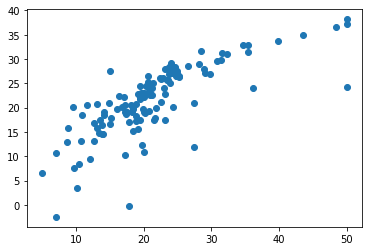

In [131]:
plt.scatter(y_test,predicted)

In [136]:
lg.predict([[5.67,9.56]]).reshape(-1,1)

array([[21.37751832]])

In [137]:
import numpy as np

In [138]:
np.sqrt(mean_squared_error(y_test,predicted))

5.435592393969394

In [140]:
#Task: Try to improve accuracy by adding more features.